# Image Classification Using ConvNets

We will implement a Convolutional Neural Net from scratch to perform image classification. Many proven implementations of this ML model already exist and are available through free libraries such as tensorflow, pytorch etc. However we will not rely on these and instead build our own, to improve our understanding of what really is happening inside of the black box.

### Dataset

We will be working with [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist): a dataset containing 28x28 grayscale images of clothing articles. Although having the same type of input and range of labels, Fashion-MNIST is an alternative which is more challenging and better yet: more representative of modern image recognition problems; compared to the classic [MNIST](https://en.wikipedia.org/wiki/MNIST_database) we all know and love.

To download the dataset:

In [ ]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz -P data
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz -P data
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz -P data
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz -P data

After doing this, make sure to unzip the tarballs in order

### Imports

In [2]:
import matplotlib.pyplot as plt
import mnist
import numpy as np
import random
import os

## Understanding the data

In [3]:
mndata = mnist.MNIST('data')

images_train, labels_train = mndata.load_training()
images_test, labels_test = mndata.load_testing()

In [4]:
x_train = np.array(images_train)
x_test = np.array(images_test)
y_train = np.array(labels_train)
y_test = np.array(labels_test)

In [7]:
x_train.shape

(60000, 784)

In [8]:
x_test.shape

(10000, 784)

We have 60000 training examples and 10000 testing examples. Each of these is a list of 784 numbers which represent each of the 28x28 pixels in the image. The value of the number represents how black the pixel is.

In [5]:
label_to_article_map= {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

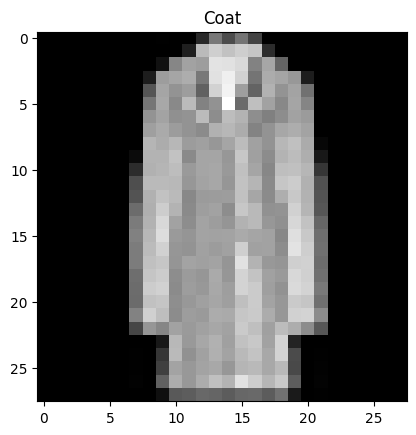

In [27]:
def display_image(index, train=True):
    if train:
        image = x_train[index]
        label = y_train[index]
    else:
        image = x_test[index]
        label = y_train[index]

    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title(f"{label_to_article_map[label]}")
    plt.show()

display_image(random.randint(0, 60000))

### Standardization

In [25]:
np.mean(x_train)

72.94035223214286

In [26]:
np.std(x_train)

90.02118235130519

We will now 